# Estadisiticas conjunto de depresión

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [2]:
repo_dir="D:/v1ktop/Drive/REPOS/augmentation_ap/"
#'/content/drive/My Drive/REPOS/augmentation_ap/'

In [3]:
 %load_ext autoreload

In [4]:
 %autoreload 2

In [5]:
import sys
sys.path.append(repo_dir)

In [6]:
from preprocesing.load_datasets import Dataset

In [7]:
#localdir="/content/drive/My Drive/DATA/erisk/2017/train/"
localdir="D:/corpus/DepresionEriskCollections/2017/train/"

In [8]:
folder_name="prep_chunks_joined"
truths_name="train_golden_truth_joined.txt"
data_key="erisk18_dev"

In [9]:
data= Dataset(key=data_key,  doc_len=64, min_len=int(64/2), chunking=False,  remove_end=False)

In [10]:
training=data.get_dataset(folder_name=folder_name, truth_name=truths_name, 
                          partition="training")

In [11]:
len(training)

4

In [12]:
len(training[0])

887

In [13]:
len(training[1])

887

# Corpus Statistics

### Numero de documentos entrenamiento.

In [14]:
from classifier.explore_data import explore_data

In [15]:
exp_cls=explore_data(training[0],training[1],plot_dir=localdir)

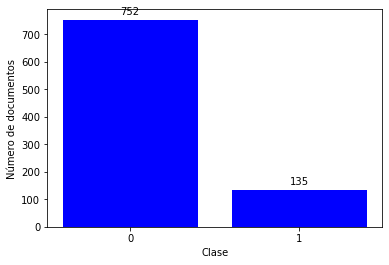

In [16]:
exp_cls.plot_class_distribution()

### Numero de sub-documentos entrenamiento.

In [17]:
data.chunking=True
training_chunks=data.get_dataset(folder_name=folder_name, truth_name=truths_name, 
                          partition="training")

In [18]:
exp_cls=explore_data(training_chunks[0],training_chunks[1],plot_dir=localdir)

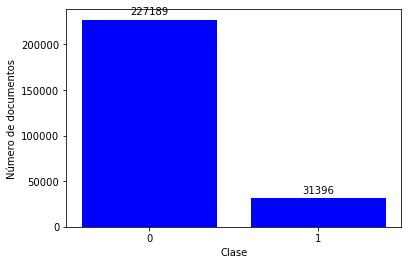

In [19]:
exp_cls.plot_class_distribution()

## Tamaño del vocabulario

In [20]:
from classifier.FeactureExtraction import feature_extraction

In [ ]:
extractor=feature_extraction(docs_train=training[0], method="count")
vocab=extractor.cv.vocabulary_

In [ ]:
len(vocab)

## 3-Folds

In [45]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [72]:
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [73]:
X=np.array(training[2])

In [74]:
y=training[1]

In [75]:
skf.get_n_splits(X, y)

3

In [76]:
print(skf)

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [87]:
training_folds=[]
test_folds=[]

In [88]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_fold=X_train, y_train
    test_fold=X_test, y_test
    
    training_folds.append(train_fold)
    test_folds.append(test_fold)

TRAIN: [283 284 285 286 287 288 289 290 291 292 293 294 296 297 298 300 301 302
 303 305 306 307 308 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 332 333 335 338 339 340 341 343 344 345
 346 347 348 349 351 352 353 354 355 356 357 359 360 361 362 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403
 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439
 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475
 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493
 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511
 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529
 530 531 532 533 534 535 536 537 538 539 540

In [91]:
len(training_folds[0][0])+ len(test_folds[0][0])

887

In [92]:
len(training[0])

887

### Guardar folds

In [94]:
from preprocesing import process_data_files as pros_data

In [99]:
save_dir=r"D:\corpus\DepresionEriskCollections\2017\train"

In [100]:
for i, data in enumerate (training_folds):
    pros_data.write_erisk_original_labels(data[0], data[1],save_dir, 
                                          file_name="fold_"+str(i)+"trainig_golden_truth.txt")

In [101]:
save_dir=r"D:\corpus\DepresionEriskCollections\2017\test"

In [103]:
for i, data in enumerate (test_folds):
    pros_data.write_erisk_original_labels(data[0], data[1],save_dir, 
                                          file_name="fold_"+str(i)+"test_golden_truth.txt")

### Documentos de evaluación

In [33]:
data= Dataset(key="erisk18_test",  doc_len=64, min_len=int(64/2), chunking=True,  remove_end=True)
eval_data= data.get_train_test()

In [34]:
len(eval_data[1][0])

298670

In [35]:
exp_cls=explore_data(eval_data[1][0],eval_data[1][1],plot_dir=localdir)

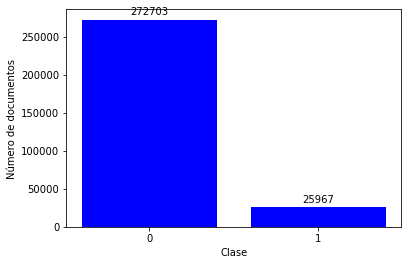

In [36]:
exp_cls.plot_class_distribution()